In [87]:
import numpy as np
import pandas as pd


# Array of users and books
# matlab: A = [1 1 0 1 0 0; 0 1 0 1 0 0; 0 0 1 1 0 1; 1 1 1 1 1 0; 0 0 1 0 0 1];

# A = np.array(
#     [
#         [0, 1, 0, 0, 0],
#         [1, 0, 0, 0, 1],
#         [0, 0, 0, 0, 1],
#         [0, 1, 1, 1, 0],
#         [1, 0, 1, 1, 1],
#         [1, 1, 1, 1, 1],
#         [0, 0, 1, 1, 1],
#         [0, 1, 0, 0, 0],
#         [0, 0, 1, 1, 1],
#         [1, 1, 0, 1, 1],
#     ]
# )

# example 1
A = np.array(
    [
        [1, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 0],
        [0, 0, 1, 0, 0, 1],
    ]
)

# A = np.array(
#     [
#         [1, 1, 1, 1, 0],
#         [0, 0, 0, 1, 1],
#         [0, 1, 0, 0, 0],
#         [1, 1, 1, 0, 1]
#     ])


U, S, Vh = np.linalg.svd(A)
V = Vh.T


In [151]:
print(A)

[[1 1 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 1]
 [1 1 1 1 1 0]
 [0 0 1 0 0 1]]


In [169]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
print(np.matrix(U))
print(np.matrix(np.diag(S)))
print(np.matrix(V))

[[-0.4754  0.3913  0.2309 -0.7515 -0.0531]
 [-0.3552  0.2526  0.601   0.5102  0.4343]
 [-0.39   -0.5971  0.3691  0.0908 -0.589 ]
 [-0.6774  0.1187 -0.6644  0.2893 -0.0436]
 [-0.192  -0.6422 -0.089  -0.2882  0.6781]]
[[3.0966 0.     0.     0.     0.    ]
 [0.     1.917  0.     0.     0.    ]
 [0.     0.     1.0823 0.     0.    ]
 [0.     0.     0.     0.6052 0.    ]
 [0.     0.     0.     0.     0.4454]]
[[-0.3723  0.2661 -0.4006 -0.7636 -0.2171 -0.    ]
 [-0.487   0.3978  0.1547  0.0794  0.7579 -0.    ]
 [-0.4067 -0.5846 -0.3551  0.1518  0.1021 -0.5774]
 [-0.6129  0.0863  0.4957  0.2294 -0.5644  0.    ]
 [-0.2188  0.0619 -0.6139  0.4781 -0.0978  0.5774]
 [-0.1879 -0.6465  0.2588 -0.3263  0.1999  0.5774]]


In [170]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn")


def plot_data(mat, data_type, camera=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if camera != None:
        ax.view_init(elev=camera[0], azim=camera[1])
    for index, row in enumerate(mat):
        ax.scatter(row[0], row[1], row[2], alpha=0.8)
        print(data_type + str(index + 1))
        print(row[0:3])
        
        ax.text(row[0], row[1], row[2],'{0} {1}'.format(data_type, index + 1), size=10)
    plt.show()

Users1
[-0.4754  0.3913  0.2309]
Users2
[-0.3552  0.2526  0.601 ]
Users3
[-0.39   -0.5971  0.3691]
Users4
[-0.6774  0.1187 -0.6644]
Users5
[-0.192  -0.6422 -0.089 ]


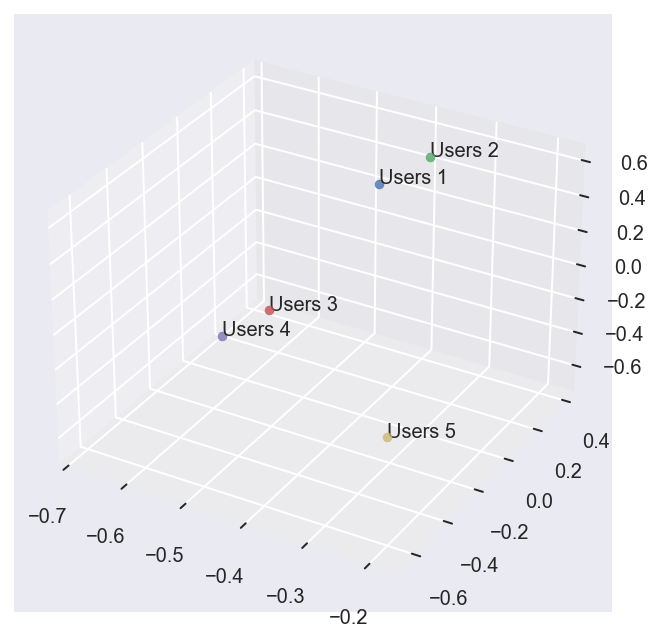

In [175]:
plot_data(U, "Users")

Books1
[-0.3723  0.2661 -0.4006]
Books2
[-0.487   0.3978  0.1547]
Books3
[-0.4067 -0.5846 -0.3551]
Books4
[-0.6129  0.0863  0.4957]
Books5
[-0.2188  0.0619 -0.6139]
Books6
[-0.1879 -0.6465  0.2588]


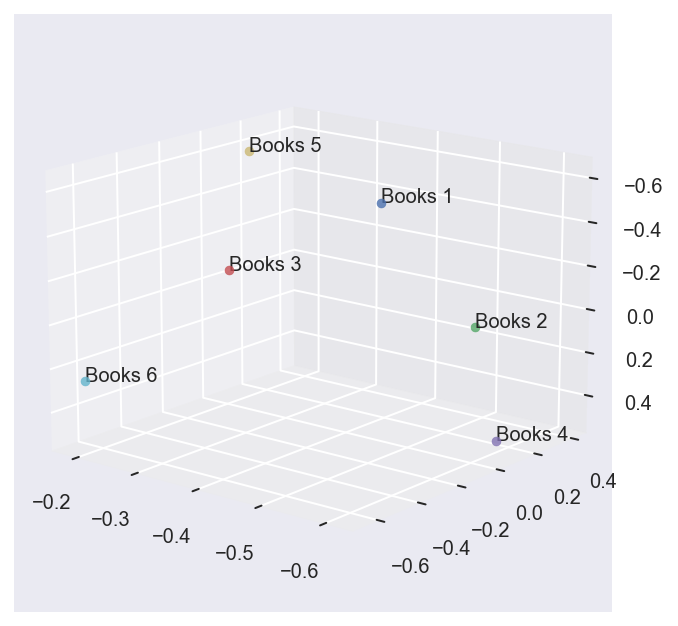

In [176]:
plot_data(V, "Books", [-164.5, 51.25])

In [183]:
def recommend(compare_index, V, output_num=2):
    print("Generating recommendations if you bought Book " + str(compare_index + 1))
    rec = []
    for index, row in enumerate(V):
        if index != compare_index:
            print("Comparing to Book " + str(index + 1))
            print(V[index])
            print(V[compare_index])
            dot_val = np.dot(V[index],V[compare_index])
            print(dot_val)
            rec.append([index + 1, np.dot(V[index],V[compare_index])])
    final_rec = [i[0] for i in sorted(rec, key=lambda x: x[1],reverse=True)]
    print(final_rec)
    return final_rec[:output_num]

In [ ]:
recommend(3, V)

In [111]:
row_index = 3
mat_without_row = np.delete(V, row_index, axis=0)

# Calculate dot product using matrix multiplication
dot_product = np.dot(mat_without_row, row)
dot_product

array([[-1.12e+00,  7.98e-01, -1.20e+00, -2.29e+00, -6.51e-01, -3.14e-16],
       [-1.46e+00,  1.19e+00,  4.64e-01,  2.38e-01,  2.27e+00, -1.90e-18],
       [-1.22e+00, -1.75e+00, -1.07e+00,  4.55e-01,  3.06e-01, -1.73e+00],
       [-6.56e-01,  1.86e-01, -1.84e+00,  1.43e+00, -2.94e-01,  1.73e+00],
       [-5.64e-01, -1.94e+00,  7.76e-01, -9.79e-01,  6.00e-01,  1.73e+00]])

In [120]:
np.dot(V[3], V[0])

-3.885780586188048e-16

In [123]:
def dot_product_with_rows(matrix, row_idx):
    row = matrix[row_idx]
    other_rows = np.delete(matrix, row_idx, axis=0)
    dot_products = np.dot(row, other_rows)
    return dot_products

In [127]:
row_idx = 3
matrix = V
row = matrix[row_idx]
other_rows = np.delete(matrix, row_idx, axis=0)
dot_products = np.dot(other_rows, row)

In [129]:
row

array([-6.13e-01,  8.63e-02,  4.96e-01,  2.29e-01, -5.64e-01,  1.05e-16])

In [130]:
V[3]

array([-6.13e-01,  8.63e-02,  4.96e-01,  2.29e-01, -5.64e-01,  1.05e-16])

In [131]:
other_rows

array([[-3.72e-01,  2.66e-01, -4.01e-01, -7.64e-01, -2.17e-01, -1.05e-16],
       [-4.87e-01,  3.98e-01,  1.55e-01,  7.94e-02,  7.58e-01, -6.33e-19],
       [-4.07e-01, -5.85e-01, -3.55e-01,  1.52e-01,  1.02e-01, -5.77e-01],
       [-2.19e-01,  6.19e-02, -6.14e-01,  4.78e-01, -9.78e-02,  5.77e-01],
       [-1.88e-01, -6.46e-01,  2.59e-01, -3.26e-01,  2.00e-01,  5.77e-01]])

In [132]:
V[0]

array([-3.72e-01,  2.66e-01, -4.01e-01, -7.64e-01, -2.17e-01, -1.05e-16])

In [136]:
np.dot(other_rows[0], row)

-3.885780586188048e-16

In [134]:
dot_products

array([-4.04e-16,  7.42e-17, -1.12e-16, -1.68e-18, -5.53e-17])